# Tripulación del titanic

Basado en el data set "train_cvs" del Titanic, https://www.kaggle.com/c/titanic/data.

**Proplem**

Predecir cuales pasajeros van a sobrevivir mediante Machine Learning.
¿Qué tipo de personas tenían más probabilidades de sobrevivir?

**About this notebook**

La idea en este notbook, es solamente mostrar la parte del analisis, lo más completo posible, basado en los conocimientos adquiridos hasta el momento, siempre pensando en que esto sirva luego para poder predecir con Machine Learning y resolver el problema planteado.

**Workflow stages**

El analisis se estructura de la siguiente forma:
* Importación de librerias.
* Leyendo el data set.
* Análisis exploratorio de datos (EDA).
 * 1. Analizando los tipos de variables (features).
 * 2. Analizando y limpiando el data set.
 * 3. Cantidades totales y estadisticas.
 * 4. Graficando y cruzando variables para entender mejor.
 * 5. Correlaciones.
* Feature Engineering.
 * 1. Discretización y Binning de las edades.
 * 2. Creando el tamaño de las familias.
 * 3. Creando los "titulos" de cada persona
 * 4. Nuevas correlaciones


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Load Data set

In [2]:
df_titanic = pd.read_csv('data_set/train.csv')

In [3]:
df_titanic_competencia = pd.read_csv('data_set/test.csv')

In [4]:
df_titanic_test = pd.read_csv('data_set/test.csv')

In [5]:
df_titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploratory Data Analysis

### 1. Analyzing the type of features

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Type of data
Al entender que tipos de datos tenemos en nuestro data set, nos ayudará a comprender mejor como realizar el análisis, que tipo de gráficos utilizar y quizás comenzar a imaginarnos cuales nos resultaran más útiles para la futura predicción.

##### Categorical: 
* Survived.
* Sex.
* Embarked

##### Ordinal:
* Pclass.

##### Numeric:
###### Continuous:
* Age.
* Fare. (Tarifa)

###### Discretos:
* PassengerId.
* SibSp.
* Parch.

###### Mix (alfanumerico):
* Ticket.
* Cabin.

### 2. Analizando y limpiando el data set

#### ¿Existen variables nulas?

In [7]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Como podemos ver, existen 177 variables nulas en la varible Edad, 687 en Cabin y 2 en Embarked.

Analizando rápidamente, podríamos descartar la variable Cabin, ya que para nuestro problema no nos es útil, además de que la mayor cantidad de valores son NaN.

Primero, realizaremos una copia de nuestro data frame y luego eliminaremos la columna mencionada.

In [8]:
df_titanic_filtered = df_titanic.copy()
df_titanic_test_filtered = df_titanic_competencia.copy()

In [9]:
df_titanic_test_filtered.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_titanic_filtered.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data = [df_titanic_filtered, df_titanic_test_filtered]

##### Eliminamos Cabin

In [12]:
for dataset in data:
    dataset.drop(columns='Cabin', inplace=True)

df_titanic_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
df_titanic_test_filtered.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

Ahora, nos queda decidir que haremos con los valores faltantes de la variable Age y Embarked.

Para la variable Emarked al ser solo dos valores, podríamos ver cual es el valor que más se repite en esa columna y reemplazarlo en los dos faltantes.

##### Completamos Embarked

In [14]:
df_titanic_filtered['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vemos que S (Southapmtpon) es el valor que más se repite, por lo tanto reemplazaremos ese valor en las instancias que lo tienen vacio.

In [15]:
for dataset in data:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].mode()[0], inplace = True)

df_titanic_filtered.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
df_titanic_test_filtered.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

Bien, ahora pasemos al tema de la edad, en este caso lo reemplazaremos por la edad promedio de los pasajeros:

##### Completamos la edad

In [17]:
for dataset in data:
    dataset['Age'].fillna(dataset.Age.mean(), inplace = True)

In [18]:
df_titanic_filtered.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df_titanic_test_filtered.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Cantidades totales y estadisticas
La idea en este punto es analizar las cantidades por separado, sin cruzar ninguna variable para ir entendiendo poco a poco el contexto.

#### Variables categoricas

In [20]:
df_titanic_filtered.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Leeni, Mr. Fahim (""Philip Zenni"")",male,CA. 2343,S
freq,1,577,7,646


##### Cantidad total de pasajeros

In [21]:
len(df_titanic_filtered)

891

##### Cantidad total de sobrevivientes (1) y fallecidos (0)

In [22]:
df_titanic_filtered.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Cantidad total de pasajeros por ciudad de embarque (C = Cherbourg, Q = Queenston, S = Southapmtpon)

In [23]:
df_titanic_filtered.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

##### Cantidad total de pasajeros por sexo

In [24]:
df_titanic_filtered.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

##### Cantidad total de pasajeros por clases (1era clase, 2da clase, 3er clase)

In [25]:
df_titanic_filtered.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Como conclusión hasta aquí, podemos decir que:
* Más del 50% de los pasajeros fallecieron.
* Más del 50% de los pasajeros embarcaron en la ciudad de Southapmtpon.
* Más del 50% de los pasajeros eran hombres.
* Más del 50% de los pasajeros viajaba en 3era clase.

#### Variables numericas

Al ser variables numericas (discretas y continuas) se puede aplicar el metodo "describe()" para ver estadisticas generales.

Se debe tener en cuenta que si bien aparece "Survived", en realidad se toma como una variable categorica y no numerica, ya que nos indica si el pasajero sobrevivio o fallecio, lo mismo se aplica para "Pclass", se podrían reemplazar los valores de esas columnas por variables que sean "String" pero luego se debería volver a convertir a numeros para aplicar Machine Learning, por lo que se decide mantener como numeros.

Además, vemos que los valores de la columna "PassengerId" no tienen mucho sentido ya que pertenecen a un numero que identifica pasajeros.

In [26]:
df_titanic_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### SibSp - Sibling = brother, sister, stepbrother, stepsister / Spouse = husband, wife (mistresses and fiancés were ignored)

In [27]:
df_titanic_filtered.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

##### Parch - Parent = mother, father / Child = daughter, son, stepdaughter, stepson

In [28]:
df_titanic_filtered.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

##### Como conclusión hasta aquí podemos decir que:
* El promedio de edad era de 28 años.
* Más del 50% de las personas viajaba solo/sola.

### 4. Graficando y cruzando variables para entender mejor
Ahora si, comenzamos a cruzar variables y gráficos para analizar ciertos supuestos sobre los sobrevivientes y fallecidos, como así también las correlaciones.

#### Relación entre el sexo de los pasajeros y la supervivencia

In [29]:
df_titanic_filtered[['Sex','Survived']].groupby('Sex').mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


Esto nos esta diciendo que el 74% de mujeres sobrevivio y solo el 18% de los hombres, pero ¿había la misma cantidad de pasajeros mujeres que hombres?

Veamos:

In [30]:
pd.crosstab(index = df_titanic_filtered.Survived, columns = df_titanic_filtered.Sex, margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [31]:
#Porcentaje total de pasajeros por sexo
df_titanic_filtered['Sex'].value_counts()*100/df_titanic_filtered.shape[0]

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Como podemos ver, en realidad, las mujeres eran el 35% (314) sobre el total de pasajeros (891) y los hombres el 65% (577, casi el doble más), es decir que, si bien sobrevivieron mayor cantidad de mujeres, la totalidad de pasajeros eran hombres, por lo que se entiende que la probabilidad de que fallecieran hombres era más alta.

A continuación lo veremos en un gráfico, donde el eje Y indica el % que sobrevivieron y el X el sexo:

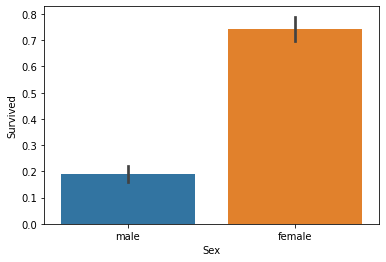

In [32]:
sns.barplot(x="Sex", y="Survived", data=df_titanic_filtered);

#### Relación entre la edad de los pasajeros, el sexo y la supervivencia

Comencemos analizando la distribución de las edades por sexo:

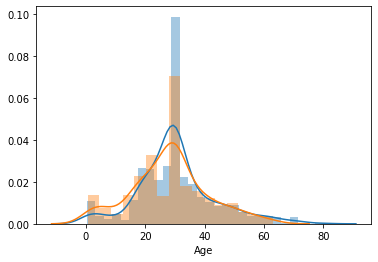

In [33]:
sns.distplot(df_titanic_filtered[df_titanic_filtered.Sex=='male'].Age)
sns.distplot(df_titanic_filtered[df_titanic_filtered.Sex=='female'].Age)

Podemos observar que ambos sexos tienen una distribución muy similar, por lo que el promedio para ambos sexos esta entre 27 y 30 años, con un maximo de 80 años por parte del sexo masculino.

Ahora, veamos en un gráfico tipo "catplo", como se relaciona la edad con el sexo y la supervivencia:

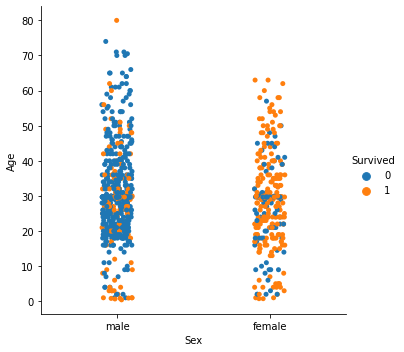

In [34]:
sns.catplot(data=df_titanic_filtered, y="Age",x="Sex",hue="Survived")

#### Relación entre la clase en la viajaban los pasajeros, la edad y la supervivencia

Primero, veamos por clase las cantidades de pasajeros que sobrevivieron.

In [35]:
pd.crosstab(index=df_titanic_filtered.Survived, columns=df_titanic_filtered.Pclass, margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


En esta tabla podemos ver que, la mayoría de los pasajeros (491) eran de tercera clase y a la vez los que menos sobrevivieron en relación a su total, por otro lado, los de 1ra clase (216) sobrevivieron en mayor cantidad, por último los de 2da clase fueron los que menos pasajeros tenian (184) y aproximadamente fallecieron la mitad.

In [36]:
df_titanic_filtered[['Survived','Pclass']].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


* El 62% de los pasajeros de primera clase sobrevivieron.
* El 47% de los de segunda clase.
* Solo el 24% de los de tercera clase.

Veamos esto en un gráfico, pero agregando la variable "Edad":

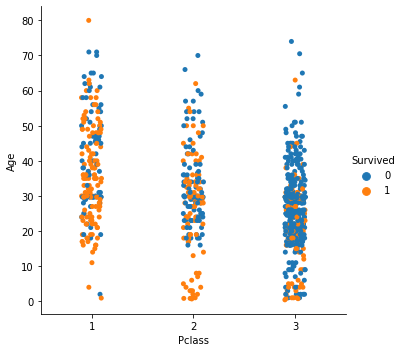

In [37]:
sns.catplot(data=df_titanic_filtered, y="Age",x="Pclass",hue="Survived")

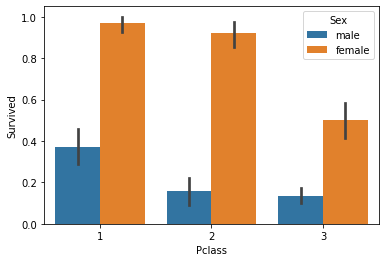

In [38]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_titanic_filtered);

#### Relación entre el lugar de embarque, la edad y la supervivencia

A continuación, veremos una primera tabla con los totales de pasajeros según su lugar de embarque y supervivencia:

In [39]:
pd.crosstab(index=df_titanic_filtered.Embarked, columns=df_titanic_filtered.Survived, margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


En porcentajes de supervivencia según su lugar de embarque:

In [40]:
df_titanic_filtered[['Survived','Embarked']].groupby(['Embarked']).mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.900929


Por último veamos la relación entre el lugar de embarque, la edad y la supervivencia, directamente en un gráfico:

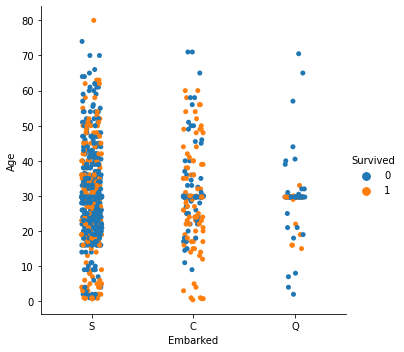

In [41]:
sns.catplot(data=df_titanic_filtered, y="Age",x="Embarked",hue="Survived")

* La mayoría como habiamos visto anteriormente embarco en S y solamente sobrevivio el 33%. 
* En segundo lugar en cantidad de pasajeros fue en C, donde sobrevivio el 38%.
* En tercer lugar en cantidad de pasajeros fue en Q, donde sobrevivio el 55%.

### Conclusión

Hasta aquí podemos decir que:
* **Sexo:** Sobrevivieron más mujeres (74%) aunque eran minoria (35%) respecto al total de pasajeros.
* **Clases:** 1ra clase fue quien tuvo la mayor cantidad de sobrevivientes con el 62%  y 3ra clase los que menos sobrevivientes tuvieron con el 24%.
* **Embarcación:** Los pasajeros que embarcaron en "C" fueron los que más sobrevivieron 55%, aunque la mayoría embarco en "S".
* **Edad:** La edad promedio de la tripulación era entre 27 y 30 años, con un máximo de 80 años.


### 5. Correlaciones

Luego del anterior analisis donde pudimos ver algunos datos interesantes, veamos las correlaciones entre todas las variables que tiene el data set.

#### Pairplot

Coloreando los valores a partir del Sexo.

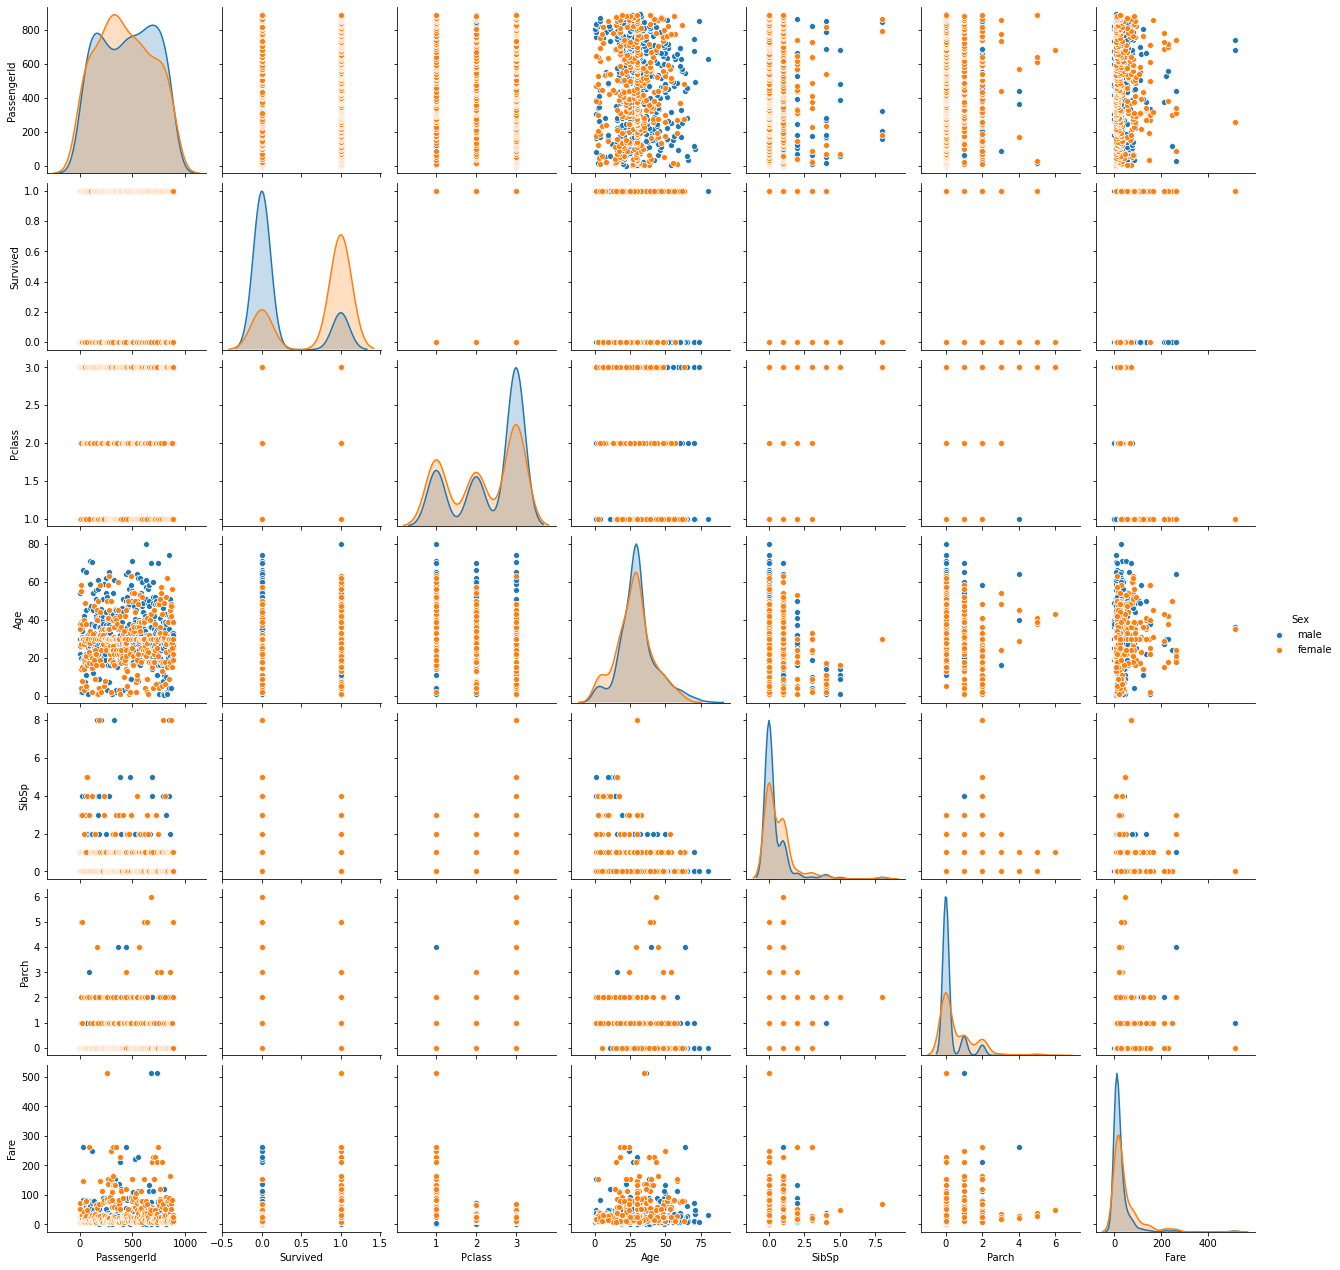

In [42]:
sns.pairplot(df_titanic_filtered, hue='Sex')

No se observa ninguna correlación entre las variables al menos en este gráfico.

#### Heatmap

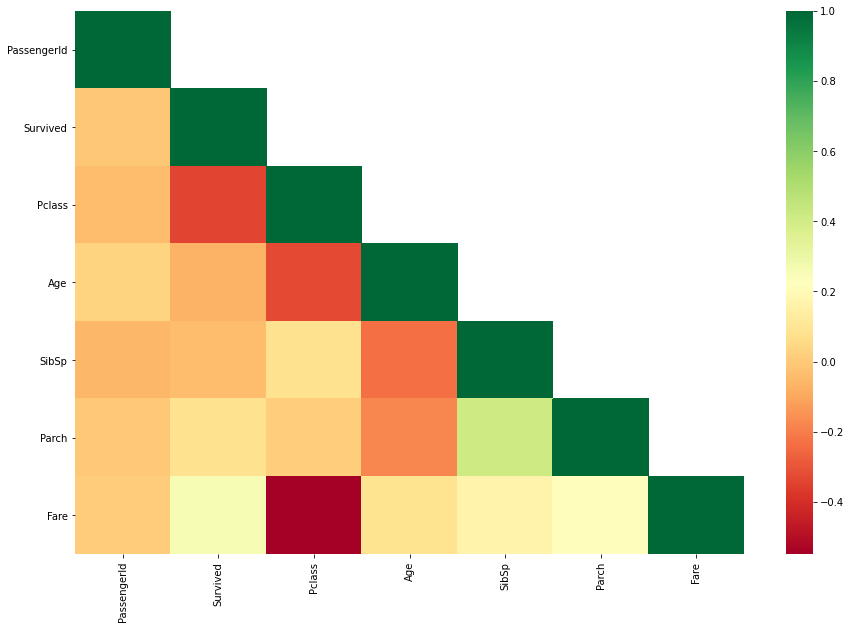

In [43]:
#retornamos la correlacion del data frame
corr = df_titanic_filtered.corr() 

# Con esa variable removemos las variables superiores ya que estan repetidas
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)

#Dibujamos el heatmap
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdYlGn');

fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Al igual que en el pairplot no se observa ninguna correlación entre las variables.

## Feature Engineering

Comenzaremos a realizar un poco de feature engineering, es decir en base a las features (variables) existentes crearemos otras nuevas.

### 1. Discretización y Binning de las edades

Al tener las edades, podemos utilizar la discretización y binning para obtener en rangos a que sector pertenecen si a niños, adultos, etc.

In [44]:
# Armamos los bins (rangos)
bins = [0, 12, 18, 27, 60, 100]
# Esta variable nos va a servir para poder identificar cada rango
names = ['Childen', 'Teen', 'Young_adults', 'adults', 'Advanced_adults']

In [45]:
# Asignamos a esta variable la serie con las nuevas columnas en base a los bins y label
category = pd.cut(df_titanic_filtered.Age, bins, labels = names)
# Concatenamos al data frame a partir de una matriz dummie la variable category
df_titanic_filtered = pd.concat((df_titanic_filtered, pd.get_dummies(category)), axis=1)

# Test
category = pd.cut(df_titanic_test_filtered.Age, bins, labels = names)
df_titanic_test_filtered = pd.concat((df_titanic_test_filtered, pd.get_dummies(category)), axis=1)

In [46]:
df_titanic_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Childen,Teen,Young_adults,adults,Advanced_adults
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,1,0,0


Podemos ver como se agregaron las nuevas features, con un 1 en caso de que pertence a ese rango de edad y con un 0 si no pertenece.

#### A partir de estas nuevas features, analizemos un poco los valores correspondientes a adultos mayores y niños:

##### Adultos mayores, es decir entre 60 y 100

In [47]:
pd.crosstab(index = df_titanic_filtered.Survived, 
            columns = df_titanic_filtered.Advanced_adults[df_titanic_filtered.Advanced_adults.values==1], 
            margins=True)

Advanced_adults,1,All
Survived,,
0,17,17
1,5,5
All,22,22


* 22 adultos mayores en total.
* 17 fallecieron.
* 5 sobrevivieron.

##### Niños, es decir entre 0 y 12 años

In [48]:
pd.crosstab(index = df_titanic_filtered.Survived, 
            columns = df_titanic_filtered.Childen[df_titanic_filtered.Childen.values==1], 
            margins=True)

Childen,1,All
Survived,,
0,29,29
1,40,40
All,69,69


* 69 niños en total.
* 29 fallecieron.
* 40 sobrevivieron.

##### Ahora, veamos en total de pasajeros por cada rango de edad:

In [49]:
df_titanic_filtered.loc[:,['Childen', 'Teen', 'Young_adults', 'adults', 'Advanced_adults']].sum().sort_values(ascending=False)

adults             532
Young_adults       198
Teen                70
Childen             69
Advanced_adults     22
dtype: int64

### 2. Creando el tamaño de familia

Agregaremos una nueva columna llamada "Family", la cual surgira de la suma entre la feature SibSp y Parch y representará el tamaño de una familia

In [50]:
data = [df_titanic_filtered, df_titanic_test_filtered]
for dataset in data:
    # Le sumaremos 1, para que cuente también a la persona individual
    Family = dataset['SibSp'] + dataset['Parch'] + 1
    #Agregamos la nueva columna al final del data frame
    dataset['Family'] = Family

In [51]:
df_titanic_test_filtered

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Childen,Teen,Young_adults,adults,Advanced_adults,Family
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0,0,0,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0,0,0,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0,0,0,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,0,0,0,1,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,0,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0,0,0,1,0,1


In [52]:
# Vemos en una tabla el tamaño de la familia vs la supervivencia
pd.crosstab(index = df_titanic_filtered['Family'], columns = df_titanic_filtered['Survived'], margins = True)

Survived,0,1,All
Family,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


Tomamos el valor "1" cuando la persona viaja sola, por lo que podemos observar que:
* Las familias numerosas de 11 y 8 personas no tuvieron sobrevivientes.
* Las personas que viajaban solas tuvieron solo 163 sobrevivientes de un total de 537.

Visto con porcentaje de supervivencia observamos lo siguiente:

In [53]:
df_titanic_filtered[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### 3. Creando los "titulos" de cada persona

Si observamos en la feature "Name" del data frame, comienza con el apellido de cada pasajero/a, luego una coma y el titulo de cada persona. De ahí, podemos saber si quien viajaba era "condesa", "lord", "cheff", "capitan", entre otros,

Para este caso me inspire en: https://www.kaggle.com/startupsci/titanic-data-science-solutions/log

In [54]:
data = [df_titanic_filtered, df_titanic_test_filtered]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [55]:
df_titanic_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Childen,Teen,Young_adults,adults,Advanced_adults,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,0,1,0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,1,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1,0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,0,1,0,0,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1,0,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1,0,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,0,1,0,0,1,1


Veamos cuantos titulos hay de cada uno y su supervivencia:

In [56]:
pd.crosstab(index = df_titanic_filtered.Title, columns = df_titanic_filtered.Survived, margins = True)

Survived,0,1,All
Title,,,
1,436,81,517
2,55,130,185
3,26,100,126
4,17,23,40
5,15,8,23
All,549,342,891


Como:
* Mlle (mademoiselle), es el equivalente en frances a Miss, lo reemplazaremos por este último.
* Ms, se utiliza cuando se desconoce su estado civil, pero al ser solo una persona la reemplazaremos por Miss.
* Mme (madame), es el equivalente en frances a Mrs

Otras definiciones:

Capt: Capitan, Col: Coronel, Countess: Condesa, Don, Dr: Doctor, Jonkheer: Es un honorífico en los Países Bajos que denota el rango más bajo dentro de la nobleza, 
Rev: Pastor, Lady: Señora, Major: ? , Sir: Señor.

Estas definiciones, a partir de ahora estaran bajo el titulo de "Others", debido a que no representan la mayoría de pasajeros y todas por separado no nos sirven.

In [57]:
# Reemplazamos lo dicho anteriormente
df_titanic_filtered['Title'].replace(to_replace=['Mlle', 'Ms', 'Mme'], value='Miss', inplace = True)
df_titanic_filtered['Title'].replace(to_replace=['Mme'], value='Mrs', inplace = True)
df_titanic_filtered['Title'].replace(to_replace=['Capt','Col','Countess','Dr','Jonkheer','Rev','Lady','Major','Sir', 'Don'], 
                                     value='Others',
                                     inplace = True)


pd.crosstab(index = df_titanic_filtered.Title, columns = df_titanic_filtered.Survived, margins = True)

Survived,0,1,All
Title,,,
1,436,81,517
2,55,130,185
3,26,100,126
4,17,23,40
5,15,8,23
All,549,342,891


In [58]:
# Visto con porcentajes
df_titanic_filtered[['Title','Survived']].groupby('Title').mean()*100

,Survived
Title,
1,15.667311
2,70.270270
3,79.365079
4,57.500000
5,34.782609


Podemos decir que los que menos pasajeros sobrevivieron fueron:
* Mr con el 15% de sobrevivientes.
* Others (recordar el reemplazo realizado anteriormente) con el 34% de sobrevivientes.

### 4. Nuevas correlaciones
Con estas nuevas features, veamos como quedaron las correlaciones:

In [59]:
data = [df_titanic_filtered, df_titanic_test_filtered]
for dataset in data:
    # Antes reemplazemos por valores numericos la columna "Sex" para que se pueda tener en cuenta en la correlación
    dataset['Sex'] = dataset.Sex.map({'male':1, 'female':0})

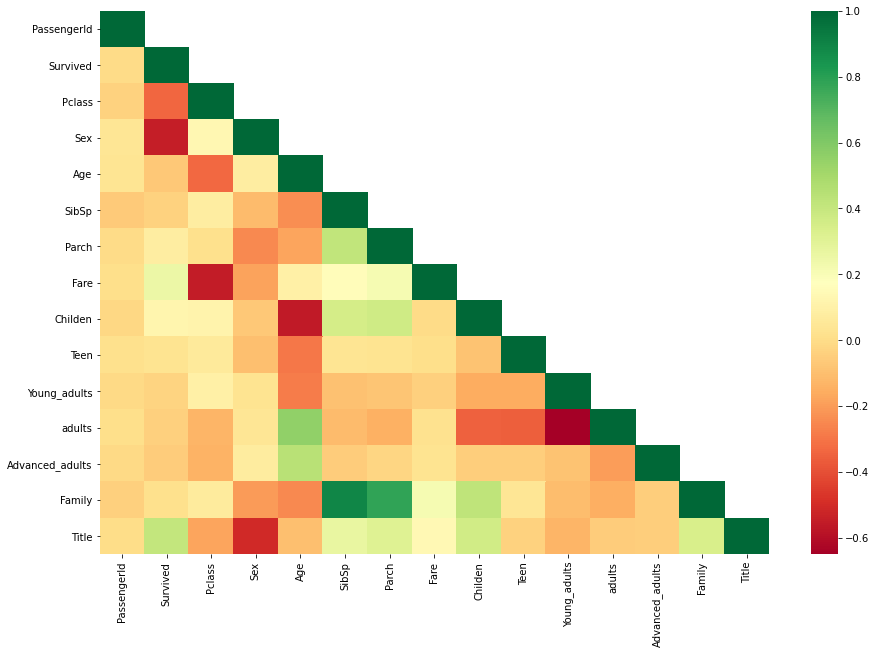

In [60]:
#retornamos la correlacion del data frame
corr = df_titanic_filtered.corr() 

# Con esa variable removemos las variables superiores ya que estan repetidas
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)

#Dibujamos el heatmap
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='RdYlGn');

fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Podemos ver algunas nuevas correlaciones con la feature Family y los rangos de edades.

# Predicción de si una persona puede o no sobrevivir

In [61]:
df_titanic_test_filtered.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Childen            0
Teen               0
Young_adults       0
adults             0
Advanced_adults    0
Family             0
Title              0
dtype: int64

In [62]:
df_titanic_filtered.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [63]:
for dataset in data:
    dataset["Embarked_encode"] = dataset.Embarked.map({"S": "1", "C": "2", "Q": "3"}).astype(int)
    dataset["Age"] =  dataset["Age"].astype(int)

In [64]:
#embarked_encode = pd.dF_ummies(df_titanic_filtered.Embarked)

In [65]:
#df_titanic_filtered = pd.concat([df_titanic_filtered, embarked_encode], axis=1)

## Arrancamos usando casi todas las features

In [375]:
#Otras combinaciones probadas pero con bajo accuracy: con Age, sin las features de por edad, con Family, sin Fare, sin Pclass
X = df_titanic_filtered.drop(columns=["Survived", "Name", "Ticket", "Embarked", "Embarked_encode", "PassengerId", "Age", "SibSp", "Parch", "Family"])
X_Test = df_titanic_test_filtered.drop(columns=["Name", "Ticket", "Embarked", "Embarked_encode", "PassengerId", "Age", "SibSp", "Parch", "Family"])

y = df_titanic_filtered.Survived

In [417]:
X_Test

,Pclass,Sex,Fare,Childen,Teen,Young_adults,adults,Advanced_adults,Title
0,3,1,7.8292,0,0,0,1,0,1
1,3,0,7.0000,0,0,0,1,0,3
2,2,1,9.6875,0,0,0,0,1,1
3,3,1,8.6625,0,0,1,0,0,1
4,3,0,12.2875,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
413,3,1,8.0500,0,0,0,1,0,1
414,1,0,108.9000,0,0,0,1,0,5
415,3,1,7.2500,0,0,0,1,0,1
416,3,1,8.0500,0,0,0,1,0,1


In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Desicion Tree

In [378]:
train_score = []
test_score = []
profundidad = np.arange(1,40,5)

for max_depth in profundidad:
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    dtc.fit(X_train, y_train)
    
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))   

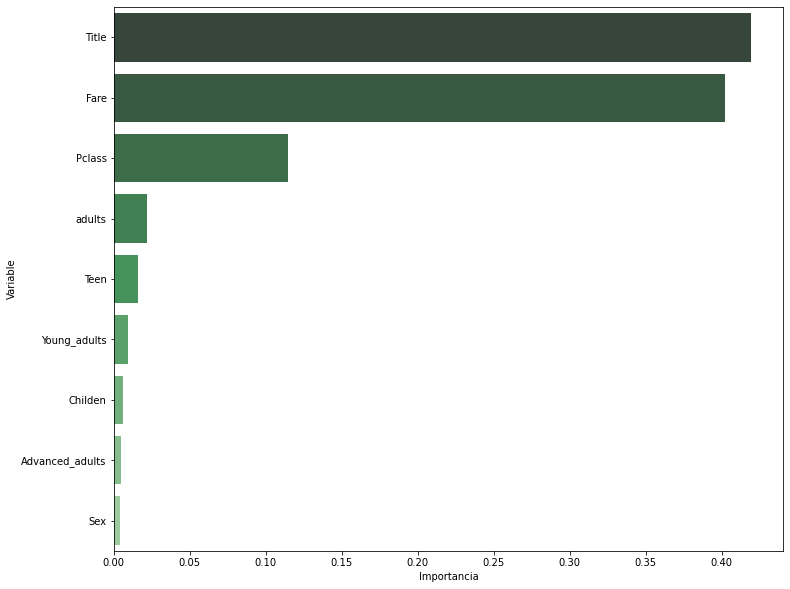

In [379]:
plt.figure(figsize=(12,10))

feat_imp_df = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), dtc.feature_importances_), X_train.columns), reverse=True))

mapping = {feat_imp_df.columns[0]:'Importancia', feat_imp_df.columns[1]: 'Variable'}
feat_imp_df = feat_imp_df.rename(columns=mapping)
sns.barplot(x=feat_imp_df['Importancia'],y=feat_imp_df['Variable'], palette="Greens_d")

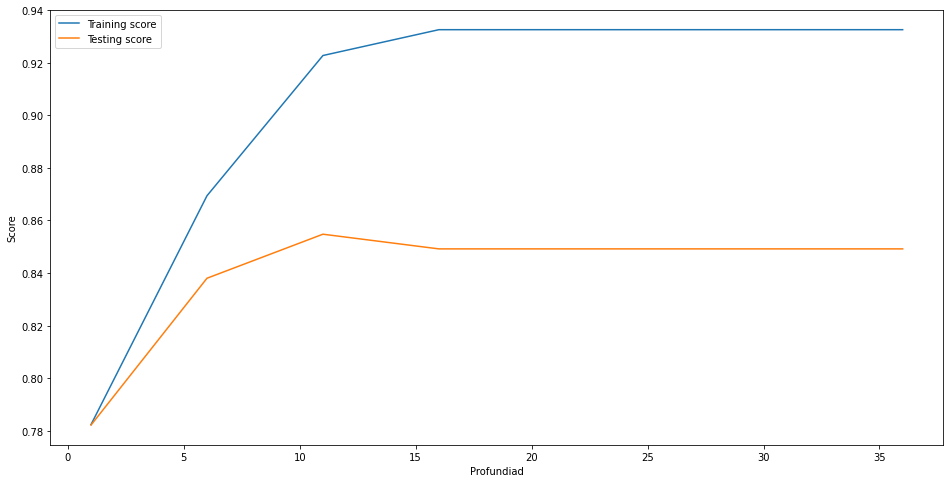

In [380]:
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(profundidad, train_score, label="Training score")
plt.plot(profundidad, test_score, label="Testing score")
plt.legend()
plt.ylabel('Score')
plt.xlabel('Profundiad')
plt.show()

In [381]:
np.argmax(test_score)

2

In [382]:
max_accuracy_tree_train = train_score[2]*100
max_accuracy_tree = np.max(test_score)*100

In [383]:
# En la profundidad donde se obtuvo el mejor valor para TEST
print('Porcentaje de aciertos sobre el set de entrenamiento:', max_accuracy_tree_train)
print('Porcentaje de aciertos sobre el set de evaluación:', max_accuracy_tree)

Porcentaje de aciertos sobre el set de entrenamiento: 92.2752808988764
Porcentaje de aciertos sobre el set de evaluación: 85.47486033519553


### Random Forest

In [384]:
train_score = []
test_score = []
profundidad = np.arange(1,40,5)

for max_depth in profundidad:
    rdm = RandomForestClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    rdm.fit(X_train, y_train)
    
    train_score.append(rdm.score(X_train, y_train))
    test_score.append(rdm.score(X_test, y_test))    

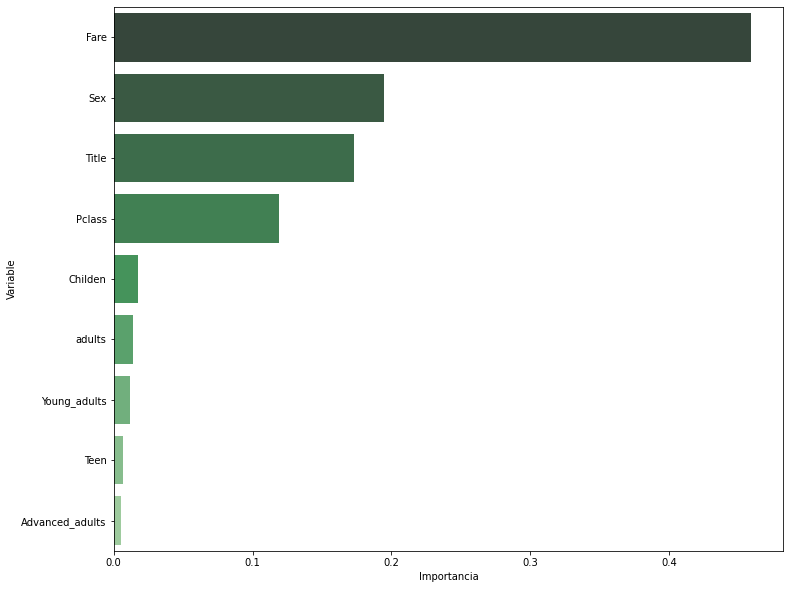

In [385]:
plt.figure(figsize=(12,10))

feat_imp_df = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rdm.feature_importances_), X_train.columns), reverse=True))

mapping = {feat_imp_df.columns[0]:'Importancia', feat_imp_df.columns[1]: 'Variable'}
feat_imp_df = feat_imp_df.rename(columns=mapping)
sns.barplot(x=feat_imp_df['Importancia'],y=feat_imp_df['Variable'], palette="Greens_d")

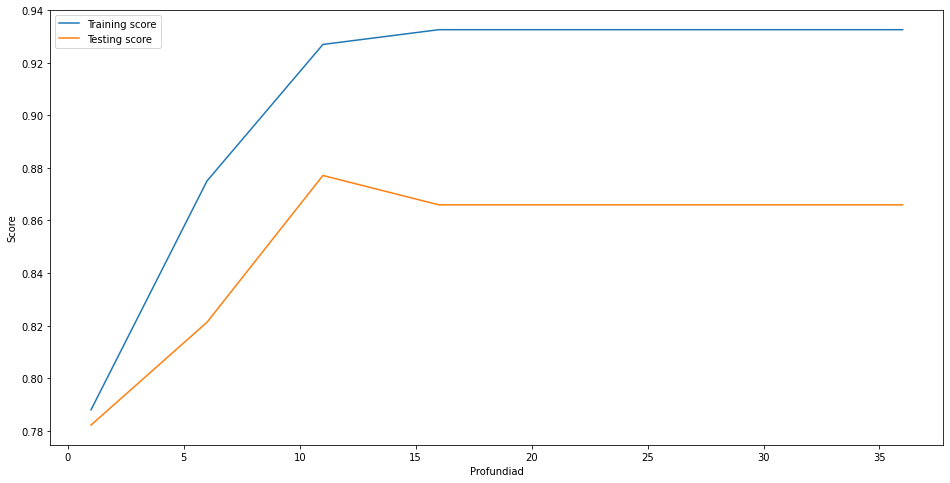

In [386]:
plt.rcParams['figure.figsize'] = (16,8)
plt.plot(profundidad, train_score, label="Training score")
plt.plot(profundidad, test_score, label="Testing score")
plt.legend()
plt.ylabel('Score')
plt.xlabel('Profundiad')
plt.show()

In [387]:
np.argmax(test_score)

2

In [388]:
max_accuracy_rdm_train = train_score[2]*100
max_accuracy_rdm = np.max(test_score)*100

In [389]:
# En la profundidad donde se obtuvo el mejor valor para TEST
print('Porcentaje de aciertos sobre el set de entrenamiento:', max_accuracy_rdm_train)
print('Porcentaje de aciertos sobre el set de evaluación:', max_accuracy_rdm)

Porcentaje de aciertos sobre el set de entrenamiento: 92.69662921348315
Porcentaje de aciertos sobre el set de evaluación: 87.70949720670392


#### Matriz de confusión para el mejor valor de profundidad en base a Test

In [390]:
rdm = RandomForestClassifier(max_depth=np.argmax(test_score)*5+1, n_jobs=-1, n_estimators=42)
rdm.fit(X_train, y_train)

y_score = rdm.predict_proba(X_test)

y_pred_train = rdm.predict(X_train)
y_pred_test = rdm.predict(X_test)

In [391]:
cm = confusion_matrix(y_test, y_pred_test)

In [392]:
pd.crosstab(y_test, y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,95,10,105
1,14,60,74
All,109,70,179


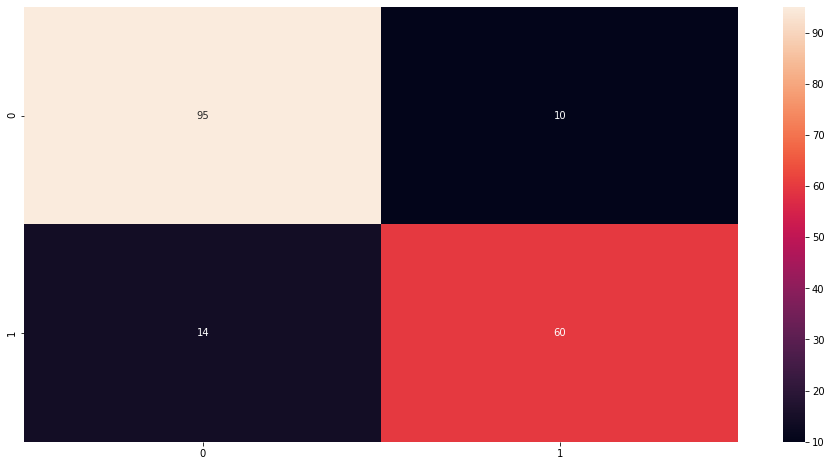

In [393]:
sns.heatmap(cm, annot=True)
plt.show()

In [394]:
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       105
           1       0.86      0.81      0.83        74

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



#### ROC AUC para Random Forest

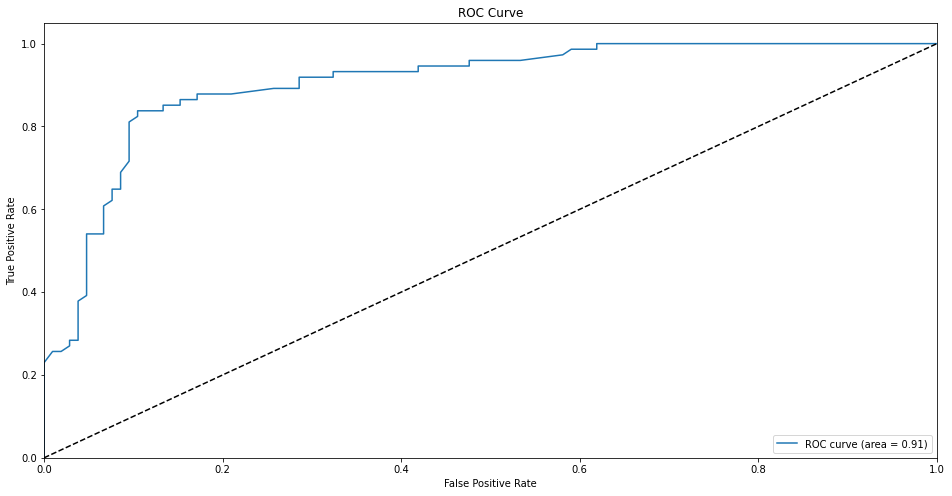

In [395]:
# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

#roc_auc = roc_auc_score(y_test, clf_sample.predict(X_test))

#Obtenemos false and true positives & thresholds
#fpr, tpr, thresholds = roc_curve(y_test, clf_sample.predict_proba(X_test)[:,1])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Curva Precision-Recall

Random Forest: f1=0.833 auc=0.864


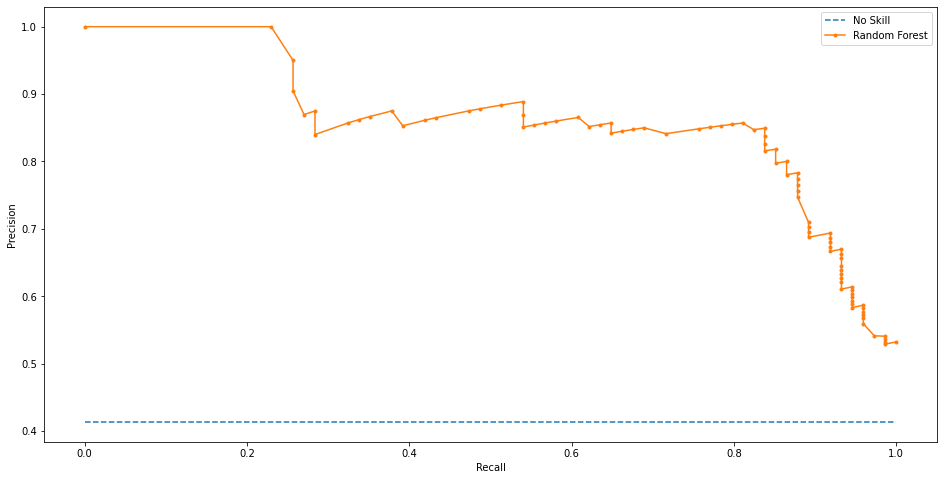

In [396]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
lr_f1, lr_auc = f1_score(y_test, y_pred_test), auc(lr_recall, lr_precision)

# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### KNN 

In [397]:
train_accuracy = []
test_accuracy = []
y_score_list = []
vecinos = np.arange(1,21,3)

for vecino in vecinos:
    knn = KNeighborsClassifier(n_neighbors=vecino, n_jobs=-1)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    y_score = knn.predict_proba(X_test)
    
    y_score_list.append(y_score)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

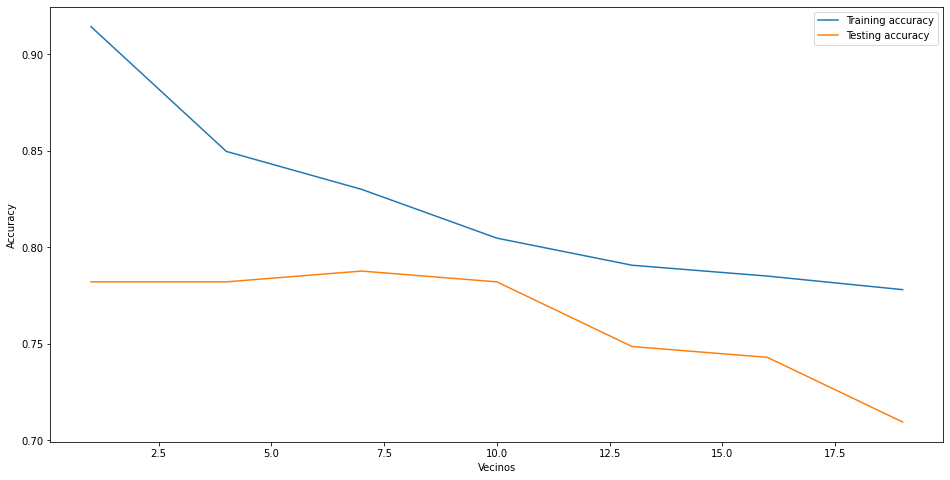

In [398]:
ax = sns.lineplot(vecinos, train_accuracy, label="Training accuracy")
ax = sns.lineplot(vecinos, test_accuracy, label="Testing accuracy")
ax.set(xlabel='Vecinos', ylabel='Accuracy')
plt.show()

In [399]:
np.argmax(test_accuracy)

2

In [400]:
max_accuracy_knn_train = train_accuracy[np.argmax(test_accuracy)]*100
max_accuracy_knn = np.max(test_accuracy)*100

In [401]:
# En la cantidad de vecinos donde se obtuvo el mejor valor para TEST
print('Porcentaje de aciertos sobre el set de entrenamiento:', max_accuracy_knn_train)
print('Porcentaje de aciertos sobre el set de evaluación:', max_accuracy_knn)

Porcentaje de aciertos sobre el set de entrenamiento: 83.00561797752809
Porcentaje de aciertos sobre el set de evaluación: 78.77094972067039


#### ROC AUC para KNN

In [402]:
np.argmax(test_accuracy)

2

In [403]:
test_accuracy

[0.7821229050279329,
 0.7821229050279329,
 0.7877094972067039,
 0.7821229050279329,
 0.7486033519553073,
 0.7430167597765364,
 0.7094972067039106]

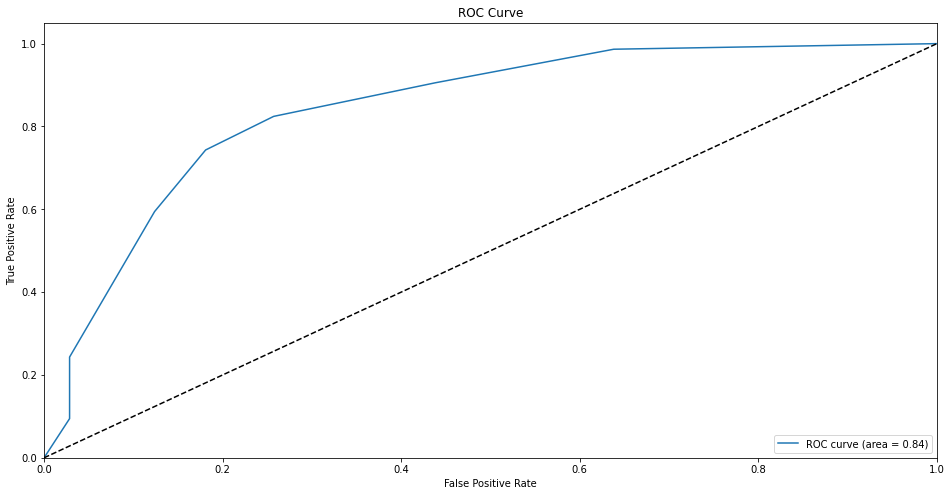

In [404]:
# Compute ROC curve and ROC area for each class
y_score = y_score_list[np.argmax(test_accuracy)]
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [405]:
gauss= GaussianNB()
gauss.fit(X_train, y_train)

y_train_pred = gauss.predict(X_train)
y_test_pred = gauss.predict(X_test)

y_score = gauss.predict_proba(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [406]:
max_accuracy_naive_train = train_accuracy*100
max_accuracy_naive = test_accuracy*100

In [407]:
print('Mayor porcentaje de aciertos sobre el set de entrenamiento:', max_accuracy_naive_train)
print('Mayor porcentaje de aciertos sobre el set de evaluación:', max_accuracy_naive)

Mayor porcentaje de aciertos sobre el set de entrenamiento: 77.3876404494382
Mayor porcentaje de aciertos sobre el set de evaluación: 75.41899441340783


#### Matriz de confusión

In [408]:
cm = confusion_matrix(y_test, y_test_pred)
#tn, fp, fn, tp

In [409]:
pd.crosstab(y_test, y_pred_test, colnames=['Predict'], rownames=["Real"], margins=True)

Predict,0,1,All
Real,,,
0,95,10,105
1,14,60,74
All,109,70,179


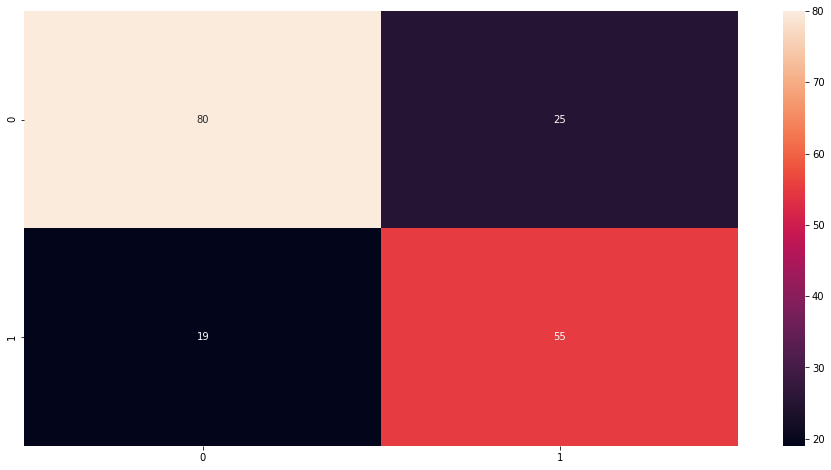

In [410]:
sns.heatmap(cm, annot=True)

#### Precision, Recall y F1

In [411]:
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       105
           1       0.69      0.74      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179



#### Curva Precision-Recall

Random Forest: f1=0.714 auc=0.751


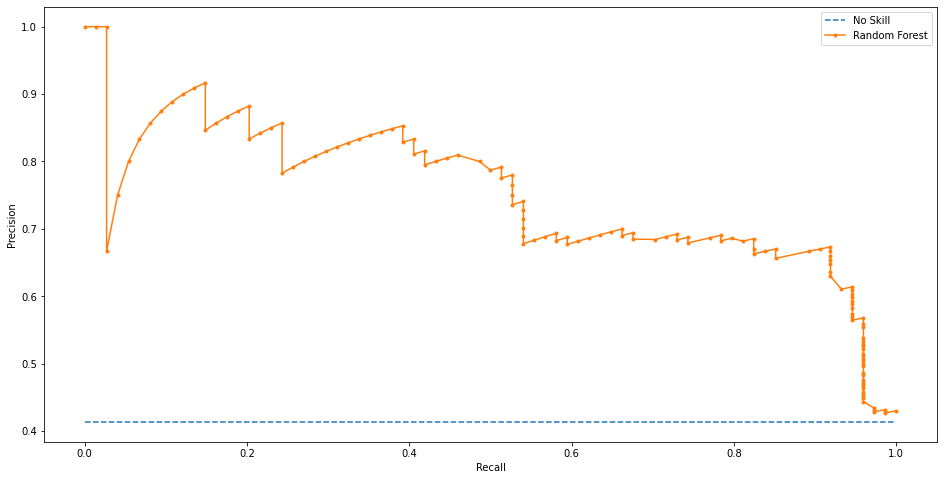

In [412]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
lr_f1, lr_auc = f1_score(y_test, y_test_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## XGBoost

In [413]:
from xgboost import XGBClassifier

In [2]:
xgb_clf = XGBClassifier(booster='gbtree', max_depth=5)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
max_accuracy_xgb = accuracy_score(y_test, y_pred)*100
max_accuracy_xgb

NameError: name 'XGBClassifier' is not defined

In [1]:
y_pred 

NameError: name 'y_pred' is not defined

## Support Vector Machine

In [415]:
svc_clf = SVC(gamma='auto', C=3)

svc_clf.fit(X_train, y_train)

y_pred = svc_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7932960893854749

In [110]:
c = np.linspace(0.5, 10, 20)
degree = np.arange(1, 12, 2)

clf = SVC()

#param_grid = [
#    {'C': c, 'kernel': ['linear', 'poly', 'rbf'], 'coef0': coef, 'degree': degree},
#]
#Creando dos diccionarios par ano usar ciertos parametros con otros que no se necesitan
param_grid = [
    {'C': c, 'kernel': ['linear']},
    {'degree': degree, 'C':c, 'kernel':['poly', 'rbf']}
]

grid_search = GridSearchCV(clf, param_grid, cv=5,
                           scoring='f1', 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/Luquitas/opt/anaconda3/envs/python/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-110-bf24cf62b4f8>", line 19, in <module>
    grid_search.fit(X_train, y_train)
  File "/Users/Luquitas/opt/anaconda3/envs/python/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 710, in fit
    self._run_search(evaluate_candidates)
  File "/Users/Luquitas/opt/anaconda3/envs/python/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 1151, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/Luquitas/opt/anaconda3/envs/python/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 682, in evaluate_candidates
    out = parallel(delayed(_fit_and_score)(clone(base_estimator),
  File "/Users/Luquitas/opt/anaconda3/envs/python/lib/python3.8/site-packages/joblib/par

KeyboardInterrupt: 

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

In [297]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[('svc', xgb_clf), ('rdm', dtc)], voting='hard')


for clf in (xgb_clf, dtc, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

XGBClassifier 0.8435754189944135
DecisionTreeClassifier 0.8491620111731844
VotingClassifier 0.8379888268156425


### Comparaciones de todos los modelos

In [416]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'XGBoost'],
    'Accuracy': [max_accuracy_tree, max_accuracy_rdm, max_accuracy_knn, max_accuracy_naive, max_accuracy_xgb]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,87.709497
0,Decision Tree,85.474860
4,XGBoost,84.357542
2,KNN,78.770950
3,Naive Bayes,75.418994


### Para la competencia

In [169]:
predictions = rdm.predict(X_Test)

output = pd.DataFrame({'PassengerId': df_titanic_test_filtered.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

